# Tutorial 4: Classification Analysis II

## Question 1:  K Nearest Neighbour (KNN)

In KNN, the class label of a test instance is predicted based on the majority class of its *k* closest training 
instances. The number of nearest neighbors, *k*, is a hyperparameter that must be provided by the user, along 
with the distance metric. By default, we can use Euclidean distance (which is equivalent to Minkowski distance 
with an exponent factor equals to r=2):

\begin{equation*}
\textrm{Minkowski distance}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^r \bigg]^{\frac{1}{r}}
\end{equation*}

__Step 1: Generate Dataset:Use the same dataset in Tutorial 3 on Model Overfitting by generating class 0 and 1__

**<font color="red">Code:</font>**

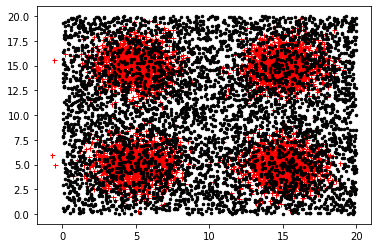

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random

N = 10000               # number of data instances

mean1 = [5, 15]
mean2 = [15, 15]
mean3 = [15, 5]
mean4 = [5, 5]

cov = [[2, 0], [0, 2]]  # diagonal covariance

np.random.seed(500)
X = np.random.multivariate_normal(mean1, cov, int(N/8))                       # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean4, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))                        # 5000 rows
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))                    # 10000 class labels (1, 0)
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=5)

__Step 2: Split into training and Test set in ratio of 70:30__
        
1)X_train: 70% of Original Data X
    
2)X_test : 30% of Original Data X
    
3)Y_train: 70% of Original Class Label Data Y 
    
4)Y_test : 30% of Original Class Label Data Y

**<font color="red">Code:</font>**

In [2]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

__Step 3: Import KNeighborsClassifier from sklearn.neighbors__
    
1)Use k range from 1,5,10,20,25,30 

2)find out the accuracy score between

i)Training accuracy : Y_train, Y_predTrain
    
ii)Test Accuracy : Y_test, Y_predTest
    
3)Plot Training Accuracy, Test Accuracy verus K values

**<font color="red">Code:</font>**

Text(0, 0.5, 'Accuracy')

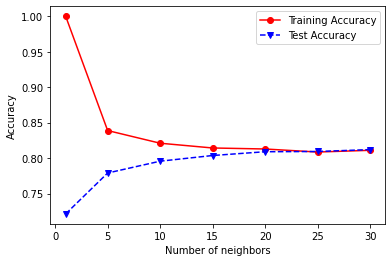

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, Y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Observation: As K values increased, Test Accuracy increases while Training Accuracy Drop. As more neighbours are 
added,performance will converge will it reached its plateau where more neighbours will not help in decision making


## Question 2:  Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” 
assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ 
theorem states the following relationship, given class variable y and dependent feature vector $x_1$ through $x_n$ :

\begin{equation*}
P(y|x_1,x_2...x_n)=\frac{P(y)P(x_1,x2...x_n|y)}{P(x1,x2...x_n)}
\end{equation*}

\begin{equation*}
predicted y = \underset{y}{\operatorname{argmax}}  P(y)\prod_{i=1}^{n}P(x_i|y)
\end{equation*}

__Step : Repeat the same process using the GaussianNB() from sklearn. Determine the train and test accuracy__

**<font color="red">Code:</font>**

In [4]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)
print("\nTraining Accuracy:",trainAcc)
print("\nTesting Accuracy:",testAcc)


Training Accuracy: 0.5855714285714285

Testing Accuracy: 0.574


Observation: The class prediction is only about half success. Why???

## Question 3:  Linear Prediction using Logistics Regression and linear Support Vector Machine

Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating 
hyperplane to distinguish instances from different classes. 

For logistic regression, the model can be described by the following equation:
\begin{equation*}
P(y=1|x) = \frac{1}{1 + \exp^{-w^Tx - b}} = \sigma(w^Tx + b)
\end{equation*}
The model parameters (w,b) are estimated by optimizing the following regularized negative log-likelihood function:
\begin{equation*}
(w^*,b^*) = \arg\min_{w,b} - \sum_{i=1}^N y_i \log\bigg[\sigma(w^Tx_i + b)\bigg] + (1-y_i) \log\bigg[1-\sigma(w^Tx_i + b)\bigg] + \frac{1}{C} \Omega([w,b])
\end{equation*}
where $C$ is a hyperparameter that controls the inverse of model complexity (smaller values imply stronger 
regularization) while $\Omega(\cdot)$ is the regularization term, which by default, is assumed to be an $l_2$-norm in sklearn.

For support vector machine, the model parameters $(w^*,b^*)$ are estimated by solving the following constrained optimization problem:
\begin{eqnarray*}
&&\min_{w^*,b^*,\{\xi_i\}} \frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{s.t.} && \forall i: y_i\bigg[w^T \phi(x_i) + b\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

__Step:__

1)Import linear model.LogisticRegession from sklearn

2)Import SVC from sklearn.svm

3)Set C range from 0.01,0.1,0.2,0.5,0.8,1,5,10,20,50

4)Repeat the same process of fitting with X_train and Y_train and predicting with X_train adn X_test

5)Calculate the accuracy score for testing and training prediction and plot verus various C

**<font color="red">Code:</font>**

Text(0, 0.5, 'Accuracy')

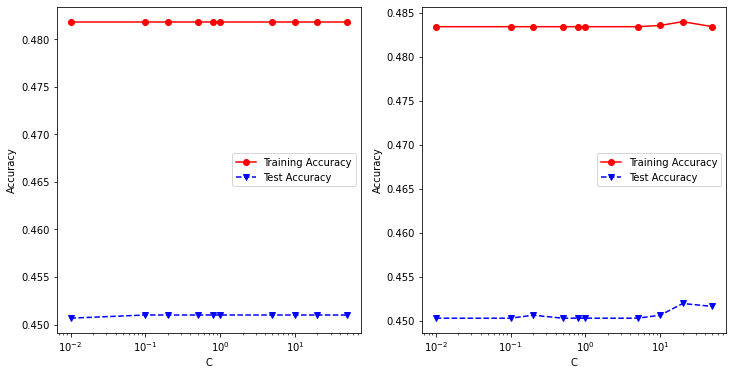

In [5]:
from sklearn import linear_model
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, Y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, Y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

Observation:Note that linear classifiers perform poorly on the data since the true decision boundaries between 
classes are nonlinear for the given 2-dimensional dataset. Can you visualize?

## Question 4:  Non Linear Support Vector Machine(SVM)

Let try nonlinear support vector machine with a Gaussian radial basis function kernel to fit the 2-dimensional 
dataset.

__Step:__Repeat the whole process of fitting, prediction and accuracy evaluation by setting SVC kernel to rbf and 
gamma=auto

**<font color="red">Code:</font>**

Text(0, 0.5, 'Accuracy')

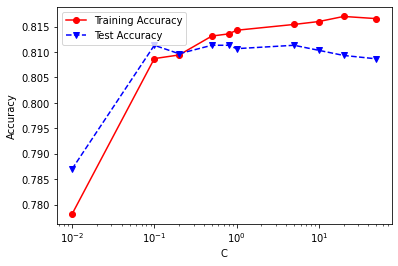

In [6]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto')
    clf5.fit(X_train, Y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Observation: By using non linear SVM, the accuarcy has improved gradually with higher C(less stringent on regularization)

## Question 5: Neural Network

Text(0, 0.5, 'Accuracy')

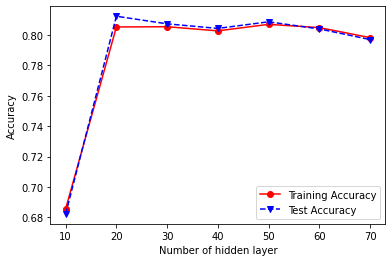

In [7]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=1,max_iter=1000)
    clf6.fit(X_train, Y_train)
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')


## Question 6: Visuilization of Decision Boundary on various classifiers 

Visualization of decision boundary on the following classifier

1)KNN(K=30)

2)Navie Bayes

3)Logistic Regression (C=50)

4)Linear SVM(C=50)

5)Non Linear SVM (RBF)

6)Decision Tree (Depth =10)

**<font color="red">Code:using contourf function to plot the decision boundary</font>**

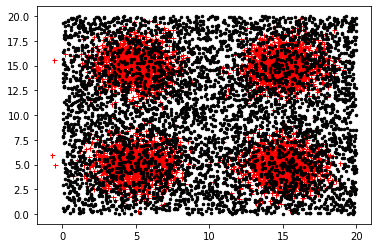

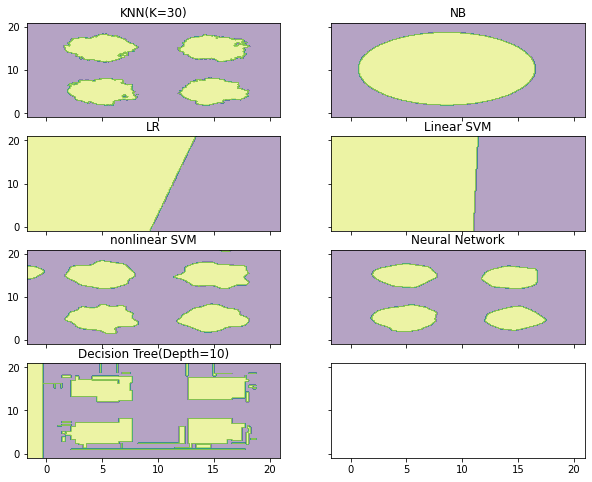

In [8]:
from sklearn.tree import DecisionTreeClassifier


clf7=DecisionTreeClassifier(max_depth=10)
clf7.fit(X_train, Y_train)

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=5)

f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0]], [clf1,clf2,clf3,clf4,clf5,clf6,clf7],['KNN(K=30)','NB', 'LR','Linear SVM','nonlinear SVM','Neural Network','Decision Tree(Depth=10)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()


Observation: As shown, KNN, Non linear SVM, Neural Network and Decision Tree can follow the contour of class and separate out the 
two binary class well